In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data_train.replace(["female" , "male"] , [0,1], inplace=True)
data_train.fillna(0,inplace=True)

In [22]:
X_train = np.array(data_train[["Pclass","Sex","Age","SibSp","Parch","Fare"]])
Y_train = np.array(data_train[["Survived"]])

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation= "sigmoid"),
    tf.keras.layers.Dense(20, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "sigmoid"),
    tf.keras.layers.Dense(2, activation= "softmax")
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"]
             )

In [24]:
output = model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.6591 - accuracy: 0.6061
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6700
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6970
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6947
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.6880
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.6981
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.6925
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7059
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7194
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7138
Epoch 11/

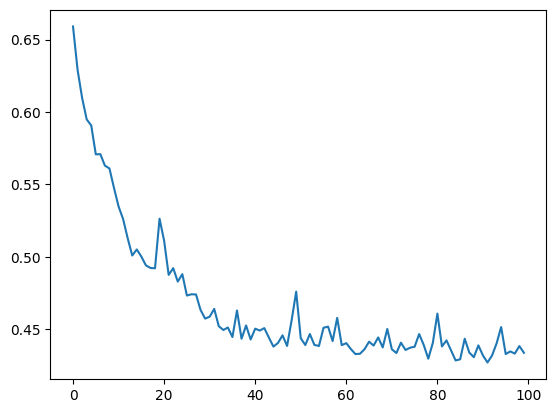

In [25]:
plt.plot(output.history["loss"])
plt.show()

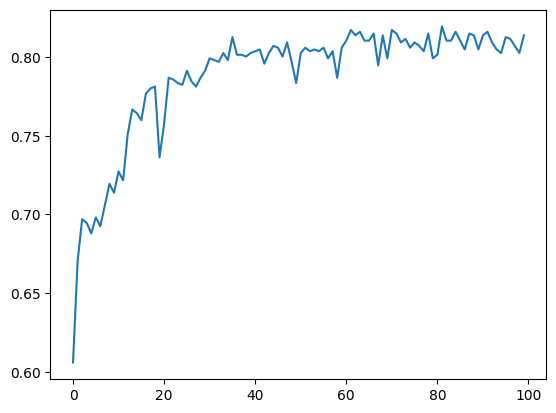

In [26]:
plt.plot(output.history["accuracy"])
plt.show()